# Randomness, Numpy, and the Central Limit Theorem

### Notebook by Daniel Lowd <lowd@cs.uoregon.edu>

Probability distributions describe random processes. One way to explore probability distributions is to generate a random sample from a probability distribution and analyzing the data, just as we would analyze a random sample from a population.


In [1]:
# Standard imports
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

You can generate random numbers using methods from ``numpy.random``. Here are a few ways to do it.

In [2]:
# Uniform distribution over the interval [0,1):
print(np.random.rand())

# Random integer from 0 to 99:
print(np.random.randint(100))

# Random integer from 1000 to 1999:
print(np.random.randint(1000,2000))

# Random sample from a standard normal distribution
print(np.random.randn())

0.8506901648451606
84
1423
2.0916768183595043


To sample from a uniform categorical distribution, use ``numpy.random.choice``. Recall that, in a uniform distribution, all outcomes are equally likely. Many functions in ``numpy.random`` allow you request an array of samples at once. Here's code for flipping a coin 100 times.

In [3]:
flips = np.random.choice(['Heads','Tails'],size=100)
flips

array(['Tails', 'Tails', 'Tails', 'Heads', 'Tails', 'Tails', 'Heads',
       'Heads', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails',
       'Heads', 'Heads', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails',
       'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails', 'Tails',
       'Heads', 'Heads', 'Tails', 'Tails', 'Tails', 'Heads', 'Heads',
       'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails',
       'Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails',
       'Heads', 'Heads', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads',
       'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails', 'Heads',
       'Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Tails', 'Tails',
       'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails',
       'Heads', 'Heads', 'Tails', 'Heads', 'Heads', 'Tails', 'Tails',
       'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails',
       'Tails', 'Tails', 'Tails', 'Tails', 'Tails', 'Heads', 'Heads',
       'Heads', 'Tai

Is our coin fair? Let's build a bar graph to see for ourselves. We'll put the array into a pandas ``Series`` object, which will let us count outcomes using ``value_counts``, then plot it with the built-in plotting functions. Sometimes you have to tell matplotlib to go ahead and show the plot when you're done.

A ``Series`` object is like one column of a ``DataFrame``. If we had multiple random variables to keep track of here, we could use a ``DataFrame``, but for one variable a ``Series`` is just right.

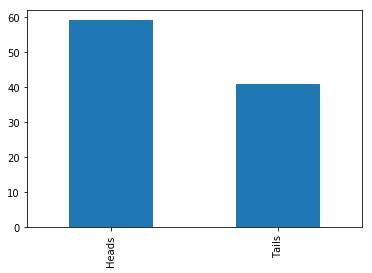

In [4]:
pd.Series(flips).value_counts().plot.bar()
plt.show()

That bar graph should be kind of close to 50% heads, 50% tails. If we repeat this experiment over and over again, how close will we be to exactly half heads, half tails? The number of heads out of 100 flips follows a binomial distribution, which we haven't discussed yet. But that doesn't matter -- we can easily simulate it ourselves by collecting many samples.

Instead of Heads and Tails, I'll switch to generating 0s and 1s from ``randint``. The advantage of 0s and 1s is that I can easily add them up using ``numpy``. With a two-dimensional size argument, I get a two-dimensional array of samples. ``sum(axis=1)`` sums each row.

Putting it all together, here's how I flip 100 fair coins, count the number of heads, and repeat the process 10,000 times. I'll summarize the results with a histogram. (Because this is a discrete distribution, it helps to give matplotlib an explicit ``range=`` argument -- otherwise, you could end up with some bins covering more discrete values than others, which leads to a weird shape. This happened in class, and I was puzzled at first.)

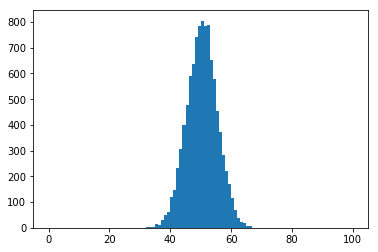

In [5]:
plt.clf()
trials = np.random.randint(2,size=(10000,100)).sum(axis=1)
plt.hist(trials, bins=100, range=[0, 100])
plt.show()

Interesting shape! We were just counting coinflips, but this looks kind of like a normal distribution. The central limit theorem (informally) says that adding up lots of distributions usually leads to a distribution that's approximately normal. That's part of why we're going to care so much about normal distributions in this class -- they show up everywhere!

For a single coinflip, the mean is 0.5 heads, the variance of 0.25, and the standard deviation of 0.5 (this is easy to check yourself!). Therefore, the sum of 100 independent coinflips should have a mean of 50 heads, a variance of 25, and a standard deviation of 5. If this distribution is approximately normal, then we should see ~68% of the trials within one standard deviation of the mean -- that is, ranging from 45 to 55. 95% should fall within 2 standard deviations (the range from 40 to 60), and 99.7% should fall within 3 standard deviations (the range from 35 to 65).

In [6]:
n = 10000 # Number of trials
mu = 50   # Mean
sigma = 5 # Standard deviation
one_sd   = np.logical_and(trials > mu - sigma,   trials <= mu + sigma)
two_sd   = np.logical_and(trials > mu - 2*sigma, trials <= mu + 2*sigma)
three_sd = np.logical_and(trials > mu - 3*sigma, trials <= mu + 3*sigma)

print("Within 1 SD: ", 100 * one_sd.sum()/n, "%")
print("Within 2 SD: ", 100 * two_sd.sum()/n, "%")
print("Within 3 SD: ", 100 * three_sd.sum()/n, "%")

Within 1 SD:  68.19 %
Within 2 SD:  95.46 %
Within 3 SD:  99.67 %


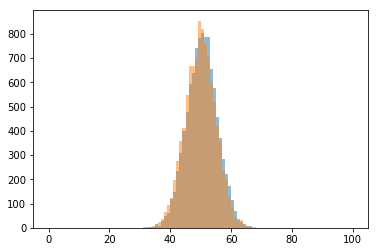

In [7]:
# Generate 10,000 samples from a normal distribution with the same mean and standard deviation
normal_trials = sigma * np.random.randn(10000) + mu

# Compare the plots
plt.clf()
plt.hist(trials, bins=100, range=[0, 100], alpha=0.5)
plt.hist(normal_trials, bins=100, range=[0, 100], alpha=0.5)
plt.show()

They line up almost perfectly! Play around with this notebook to see under what conditions the coinflips aren't approximately normal.